# Practical 5C

This practical is related to Example 1(b).
<br> Use the functions developed in Practical 5B to create the PCA results table, scree plot, loading plot and score plot.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [51]:
data = pd.read_csv("Chp5Eg1.csv")
data.head()

,Social Class/ No. of children,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,B2,332,428,354,1437,526,247,427
1,W2,293,559,388,1527,567,239,258
2,U2,372,767,562,1948,927,235,433
3,B3,406,563,341,1507,544,324,407
4,W3,386,608,396,1501,558,319,363


In [52]:
data_reduced = data.drop(['Social Class/ No. of children'], axis=1)
data_reduced.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,558,319,363


In [53]:
# scaling the data before PCA
from sklearn.preprocessing import scale
data_reduced = pd.DataFrame(scale(data_reduced), columns=['Bread','Vegetables','Fruit','Meat','Poultry','Milk','Wine'])
data_reduced.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,-1.128068,-1.678389,-0.955310,-1.186982,-1.147069,-0.992058,0.849995
1,-1.522049,-0.955136,-0.740207,-0.949454,-0.974588,-1.063397,-1.609050
2,-0.723984,0.193236,0.360614,0.161651,0.539880,-1.099066,0.937299
3,-0.380512,-0.933052,-1.037556,-1.002238,-1.071346,-0.305420,0.558984
4,-0.582554,-0.684606,-0.689595,-1.018073,-1.012450,-0.350007,-0.081241


In [54]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=7).fit(data_reduced)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_reduced)

## Task 1
Obtain the PCA results table.

In [55]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # PCA cum explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [56]:
pca_results = pca_results(data_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
PC 1,4.6900,0.6142,0.6142,0.2324,0.4657,0.4505,0.4658,0.4355,0.2781,-0.2054
PC 2,2.0171,0.2641,0.8783,0.6259,0.0993,-0.1963,-0.1325,-0.1994,0.5193,0.4826
PC 3,0.7057,0.0924,0.9707,0.0181,-0.0829,0.1351,0.1979,0.3811,-0.4631,0.7587
PC 4,0.1315,0.0172,0.9879,-0.5633,0.0738,0.5375,-0.0999,-0.3144,0.3954,0.3510
PC 5,0.0669,0.0088,0.9967,-0.0214,0.8403,-0.0745,-0.3247,-0.1949,-0.3755,0.0590
PC 6,0.0238,0.0031,0.9998,0.4859,-0.2263,0.6551,-0.2071,-0.3243,-0.3392,-0.1430
PC 7,0.0014,0.0002,1.0000,-0.0112,-0.0610,0.1293,-0.7537,0.6191,0.1616,-0.0452


## Task 2
Obtain the screen plot.

<Figure size 432x288 with 0 Axes>

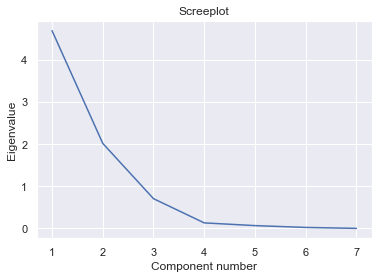

In [57]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

## Task 3
Obtain the loading plot.

In [58]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(data_reduced)
scores2 = pca2.transform(data_reduced)

In [59]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

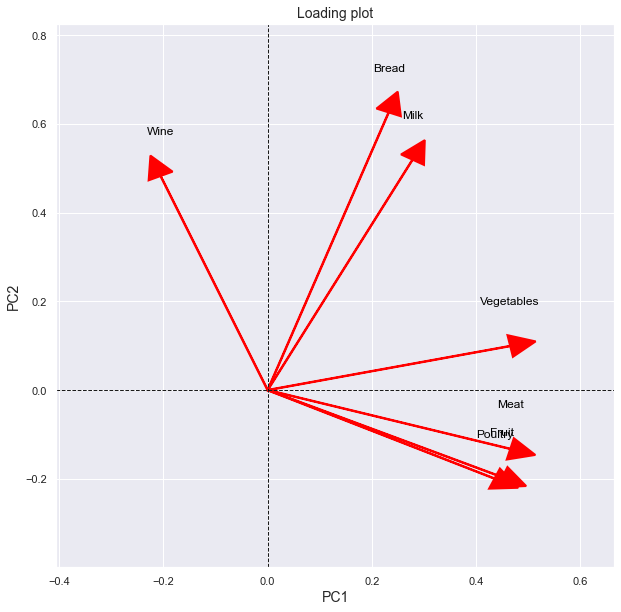

In [60]:
plt.clf
ax2 = loadingplot(data_reduced, pca2, width=10, height=10, margin=0.2)
plt.show()

## Task 4
Obtain the score plot.

In [61]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()


In [62]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)
    text_pos = 0.15
    # Print text
    for i, v in enumerate(np.array(scores)):
        ax.text(v[0], v[1]+text_pos, data.iloc[i,0], color='black', ha='center', va='center', fontsize=12)
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

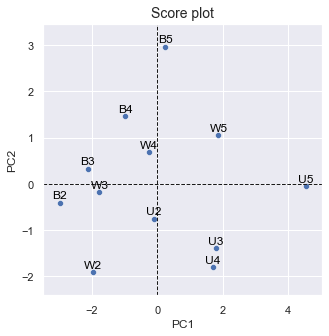

In [63]:
plt.clf
ax3= scoreplot_label(data,scores_centred,pca)
plt.show()